In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

In [9]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

In [16]:
df1 = pd.read_csv("../data/NaverNews_인기 콘솔게임.csv")
df1.head()

,title,link,content
0,"[게임, 현대미술이 되다…국립현대미술관 '게임사회'전]",https://n.news.naver.com/mnews/article/001/001...,[\nMoMA·스미스소니언미술관 소장 게임 등 소개\n\n\n\n(서울=연합뉴스) ...
1,"[액션스퀘어, 삼국블레이드 IP 활용 모바일 게임 中 서비스 임박]",https://n.news.naver.com/mnews/article/018/000...,[\n\t\t\t[이데일리 이용성 기자] 액션스퀘어(205500)는 자사 모바일 게...
2,[],https://sports.news.naver.com/news.nhn?oid=439...,[]
3,"[위메이드, 마이크로소프트와 콘솔 게임 출시 협의]",https://n.news.naver.com/mnews/article/092/000...,[\n위메이드 최초의 콘솔 플레이 지원 신작 출시 관련 협력 논의 중위메이드(대표 ...
4,"[위메이드, 첫 콘솔 신작 출시 MS와 협의 중]",https://n.news.naver.com/mnews/article/003/001...,[\n기사내용 요약위메이드 최초 콘솔 신작 MS 플랫폼 플레이 협의 중자사 게임에 ...


In [17]:
# 워드 클라우드를 시행하기 위한 함수

import re 
from wordcloud import WordCloud

def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    return text

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path="../data/HMFMPYUN.ttf",
        width = width, height = height,
        background_color = 'white',
        random_state = 42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 5))
    plt.imshow(word_draw)
    plt.axis('off')
    plt.show()

In [26]:
# 기사 내용(content)을 popular_game 에 담습니다.

popular_game = str(df["content"].tolist())
popular_game = get_string(popular_game)

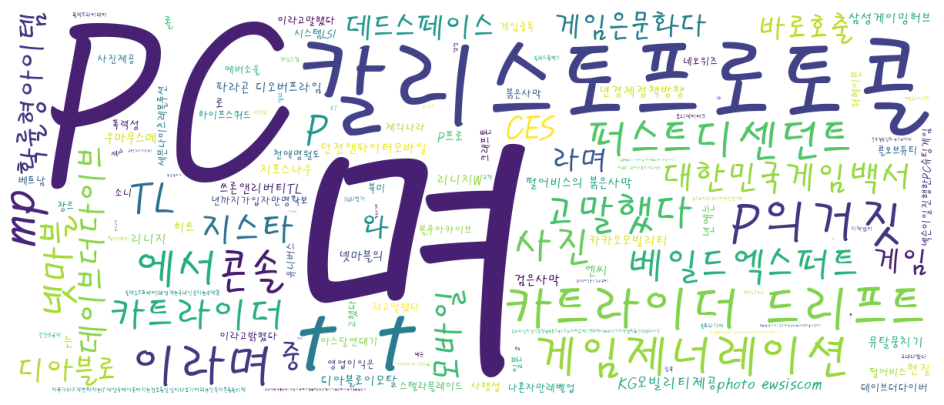

In [27]:
wordcloud(popular_game)

In [28]:
# 기사 헤드라인(title)을 popular_game2 에 담습니다.

popular_game2 = str(df["title"].tolist())
popular_game2 = get_string(popular_game2)

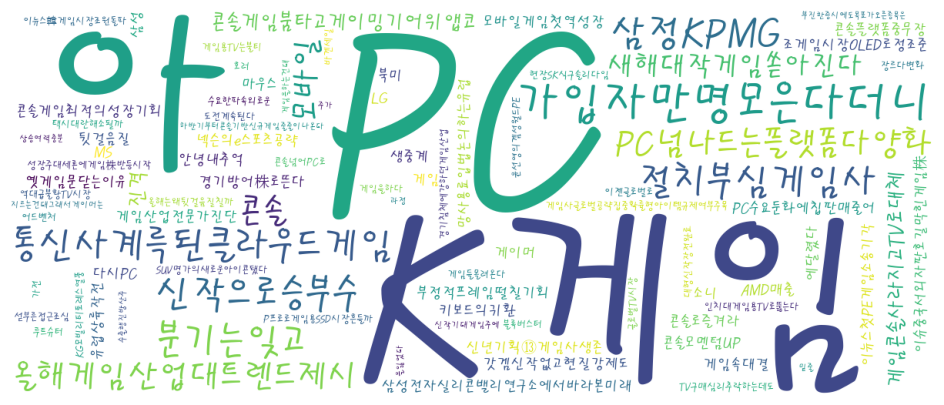

In [29]:
wordcloud(popular_game2)